<a href="https://colab.research.google.com/github/juangross/cursoPDI2021/blob/main/PDI_TP2_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP2)
  La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

**Observaciones**: para cada uno estos deben mostrar la imagen original vs el resultado de la modificación realizada a la imagen para un diferente rango de valores de prueba de Y e IQ.

La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris. 

**Observaciones**: el objetivo es ver cómo con diferentes paletas de colores se pueden apreciar ciertos detalles de una imagen, sin necesidad de modificar el contenido de la misma.
Les sugiero no utilizar imágenes de más de 1000 X 1000 pixeles


**Parte 1**

In [3]:
!git clone https://github.com/juangross/cAM

Cloning into 'cAM'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 52 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


Cargo imagen de prueba


In [4]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import imageio as img
import numpy as np


# Import an image from directory:
path="./cAM/imagenes/"
#archi="patron_RGBCMYWK"
archi="río_uruguay_4"
archo="output"
archo2="output2"
ext="png"

#formato actual

print("leyendo archivo:", f"{path}{archi}.{ext}")
#input_image= mpimg.imread(f"{archi}.{ext}")  #lee con matplotlib
input_image=img.imread(f"{path}{archi}.{ext}")      #lee con imageio

#print ("imagen de entrada")
#plt.subplot(1,2,1)
#plt.imshow(input_image)
input_tam=input_image.shape

print("Dimensiones (X,Y,canales): ", input_tam)
print("tipo de datos: " , input_image.dtype)
#print("Datos en crudo: ")
#input_image[:]

leyendo archivo: ./cAM/imagenes/río_uruguay_4.png
Dimensiones (X,Y,canales):  (480, 853, 3)
tipo de datos:  uint8


**Parte 1** - transformo la imagen de prueba a espacio YIQ y genero un set de imágenes alteradas

alfa


FloatSlider(value=1.0, max=2.0, min=-2.0)

beta


FloatSlider(value=1.0, max=2.0, min=-2.0)

Button(description='Generar salida', style=ButtonStyle())

Output()

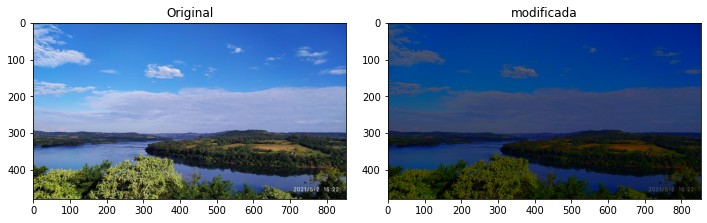

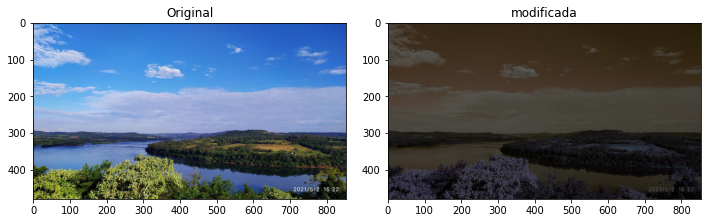

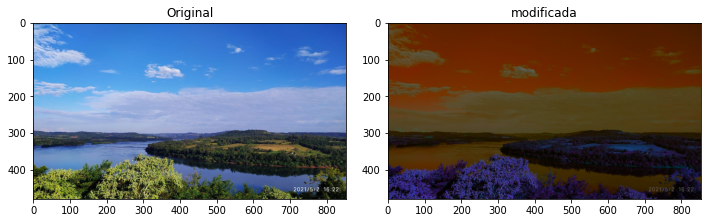

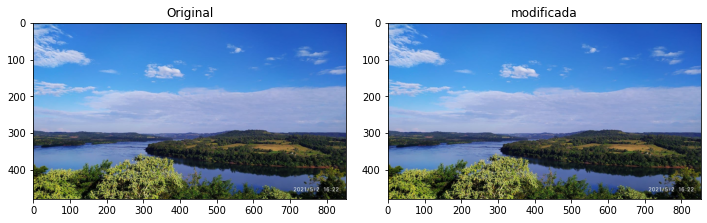

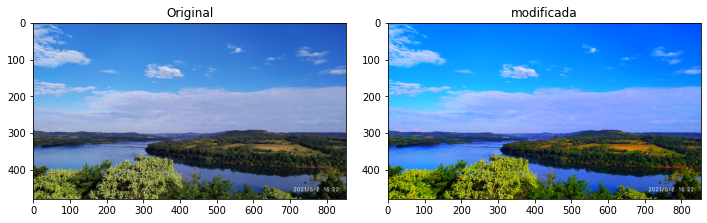

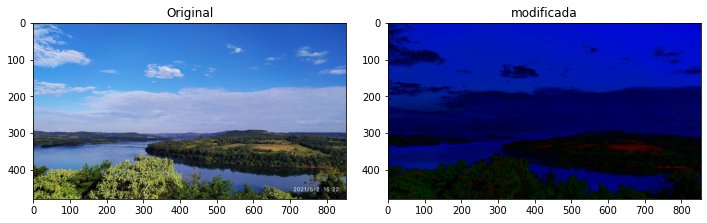

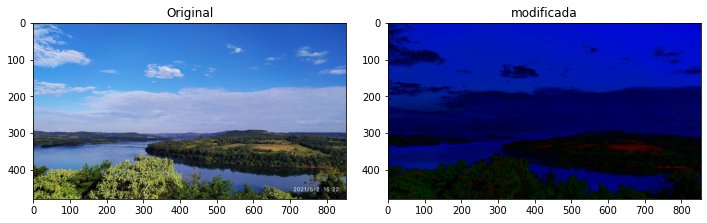

In [7]:
#creo un array nuevo pero vacío usando numpy
input_image_norm=np.zeros(input_tam, dtype=float)
#normalizo los valores correspondientes a cada canal RGB. haciendo: <valor color pixel>/256
#solamente se normaliza si el valor del color para ese canal es >0.

#normalizo la imagen
input_image_norm=1/255*input_image
#print(input_image_norm)
#print(input_image_norm.shape)

#transformo a YIQ
#me baso en esta explicación del producto matricial para hacer la conversión de bases
#https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
YIQ_image=np.zeros(input_tam, dtype=float)

YIQ_image_mod0=np.zeros(input_tam, dtype=float)


#matriz de conversión de RGB -> YIQ
RGB2YIQ=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]], dtype=float)





import ipywidgets as widgets
salfa = widgets.FloatSlider(value=1,min=-2, max=2)
print("alfa")
display(salfa)
sbeta = widgets.FloatSlider(value=1,min=-2, max=2)
print("beta")
display(sbeta)

button = widgets.Button(description="Generar salida")
output = widgets.Output()


def on_button_clicked(b):
  with output:
    #imagen de entrada en formato YIQ
    YIQ_image=np.dot(input_image_norm,RGB2YIQ.T.copy())
    #print("imagen YIQ")
    #print(YIQ_image)
    YIQ_image_mod0 = YIQ_image
    YIQ_image_mod0[:,:,0] = YIQ_image[:,:,0]*salfa.value #canal Y
    YIQ_image_mod0[:,:,1] = YIQ_image[:,:,1]*sbeta.value  #canal I
    YIQ_image_mod0[:,:,2] = YIQ_image[:,:,2]*sbeta.value  #canal Q
    
    #recorto los valores extremos
    YIQ_image_mod0[:,:,0]=np.clip(YIQ_image_mod0[:,:,0],0,1) #recorto los valores Y
    YIQ_image_mod0[:,:,1]=np.clip(YIQ_image_mod0[:,:,1],-.5957,.5957) #recorto los valores I
    YIQ_image_mod0[:,:,1]=np.clip(YIQ_image_mod0[:,:,1],-.5226,.5226) #recorto los valores Q

    #Matriz de conversión YIQ -> RGB normalizado
    YIQ2RGB=np.array([[1,0.9663,0.6210 ],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]], dtype=float)

    #convierto las imágenes YIQ -> RGB normalizado
    output_image_norm_RGB0= np.dot(YIQ_image_mod0,YIQ2RGB.T.copy())

    #desnormalizar RGB
    output_image0=255*output_image_norm_RGB0
    output_image0=np.rint(output_image0)  #redondeo a valores enteros
    output_image0=np.clip(output_image0,0,255) #recorto los valores que superen 255
    
    #mostrar imagenes
    fig, ax = plt.subplots( 1,2, figsize=(10,10))
    fig.tight_layout()

    #aquí se debiera mostrar
    ax[0].imshow(input_image ) #imagen de entrada
    ax[0].title.set_text('Original')
    ax[1].imshow(output_image0.astype('uint8'))  #imagen alterada 1
    ax[1].title.set_text('modificada')
button.on_click(on_button_clicked)
display(button, output)
